In [28]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import pickle

D = pickle.load(open('D.p','rb'))
V = pickle.load(open('V.p','rb'))
Aa = pickle.load(open('A.p','rb'))
P = pickle.load(open('P.p','rb')) 
MAT = pickle.load(open('MAT.p','rb')) 

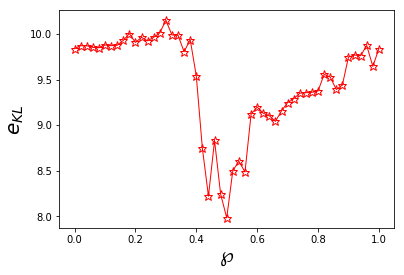

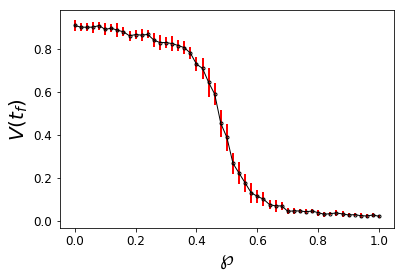

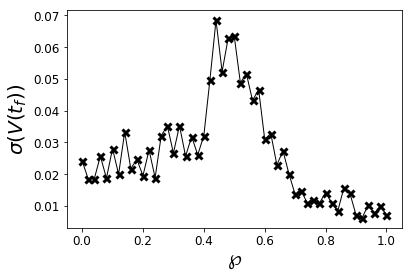

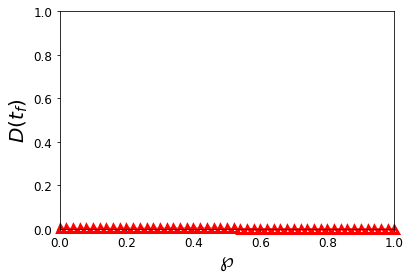

In [2]:
meanD=[]
for i in range(len(D)):
    for j in range(len(D[i])):
        D[i][j].sort(reverse=True)
for i in range(len(D)):
    meanD+=[[float(sum(col))/len(col) for col in zip(*D[i])]]


for item in meanD:
    for i in range(len(item)):
        if item[i]==0:
            item[i]=0.001
for item in meanD:
    m=sum(item)
    for j in range(len(item)):
        item[j]=item[j]/float(m)
        
def KL(distrib):
    n = len(distrib)
    kld = np.zeros((n, n))
    for i in range(n):
        for j in range(n):
            #if(i != j):
            kld[i, j] = stats.entropy(distrib[i], distrib[j])+stats.entropy(distrib[j], distrib[i])
    return kld

def KL2(distrib):
    kld=[]
    for item in distrib:
        kld+=[stats.entropy(item, distrib[0])+stats.entropy(distrib[0],item)+stats.entropy(item, distrib[-1])+stats.entropy(distrib[-1],item)]
    return kld

A=KL2(meanD)
    
THETA=[]
for k in range(51):
    THETA+=[k/float(50)]

plt.plot(THETA, A,color='r',linewidth=1,marker='*',markersize=9,fillstyle='none',markeredgewidth=1,clip_on=False)
#plt.legend(loc='best')
plt.ylabel('$e_{KL}$',fontsize=20)
plt.xlabel(r'$\wp$',fontsize=20)
plt.rcParams.update({'font.size': 12})          
plt.savefig('KL6464.pdf', format='pdf', transparent=True, bbox_inches='tight',dpi=800)
plt.show()
plt.close()

meanV=[]
meanA=[]
STDV=[]

for item in V:
    meanV+=[float(sum(item))/len(item)]
    STDV+=[np.std(item)]

for item in Aa:
    meanA+=[float(sum(item))/len(item)]

plt.errorbar(THETA, meanV, yerr=STDV,ecolor='r',color='k',linewidth=1,elinewidth=2,marker='o',markersize=3,fillstyle='none',markeredgewidth=1,clip_on=False)
#plt.legend(loc='best')
plt.ylabel('$V(t_f)$',fontsize=20)
plt.xlabel(r'$\wp$',fontsize=20)
plt.rcParams.update({'font.size': 12})
plt.savefig('finalmeanV6464.pdf', format='pdf', transparent=True, bbox_inches='tight',dpi=800)
plt.show()
plt.close()

plt.plot(THETA,STDV,'k',marker='x',markersize=7,fillstyle='none',markeredgewidth=3,clip_on=False,linewidth=1)
#plt.legend(loc='best')
plt.ylabel(r'$\sigma(V(t_f))$',fontsize=20)
plt.xlabel(r'$\wp$',fontsize=20)
plt.rcParams.update({'font.size': 12})
plt.savefig('finalmeanVSTD6464.pdf', format='pdf', transparent=True, bbox_inches='tight',dpi=800)
plt.show()
plt.close()

plt.plot(THETA,meanA,'red',marker='^',markersize=7,fillstyle='none',markeredgewidth=3,clip_on=False,linewidth=1)
#plt.legend(loc='best')
plt.ylabel('$D(t_f)$',fontsize=20)
plt.xlabel(r'$\wp$',fontsize=20)
plt.rcParams.update({'font.size': 12})
plt.axis([0,1,0,1])
plt.savefig('finalmeanA6464.pdf', format='pdf', transparent=True, bbox_inches='tight',dpi=800)
plt.show()

plt.close()


In [3]:
len(A)

101

## grafos bipartitos!

In [8]:
import networkx as nx
from networkx.algorithms import bipartite

In [9]:
def graph(matrix):
    
    B=nx.Graph()
    n=len(matrix)
    for i in range(n):
        for j in range(n):
            try:
                if matrix[i][j]==1:
                    B.add_node(i,bipartite=0)
                    B.add_node(j+n,bipartite=1)
                    B.add_edge(i,j+n)
            except ValueError:
                print(i,j)
                
    return B

In [36]:
graphs={THETA[i]:[graph(M) for M in P[i]] for i in range(51)}

### components

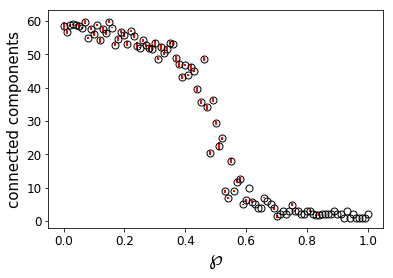

In [7]:
meanC=[]
stdC=[]

for key in graphs.keys():
    meanC+=[np.mean([nx.number_connected_components(graph) for graph in graphs[key]])]
    stdC+=[np.std([nx.number_connected_components(graph) for graph in graphs[key]])]

plt.errorbar(THETA, meanC, yerr=stdC,ecolor='r',color='k',linewidth=0,elinewidth=2,marker='o',markersize=7,fillstyle='none',markeredgewidth=1,clip_on=False)
#plt.legend(loc='best')
plt.ylabel('connected components',fontsize=15)
plt.xlabel(r'$\wp$',fontsize=20)
plt.rcParams.update({'font.size': 12})
plt.savefig('components.pdf', format='pdf', transparent=True, bbox_inches='tight',dpi=800)
plt.show()
plt.close()

### max degree

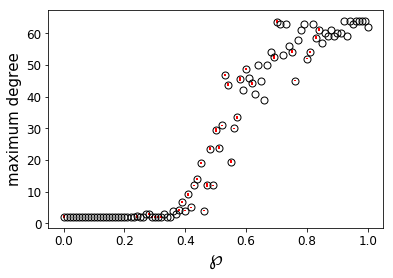

In [8]:
meanD=[]
stdD=[]

for key in graphs.keys():
    meanD+=[np.mean([np.max(list(dict(graph.degree()).values())) for graph in graphs[key]])]
    stdD+=[np.std([np.max(list(dict(graph.degree()).values())) for graph in graphs[key]])]

plt.errorbar(THETA, meanD, yerr=stdD,ecolor='r',color='k',linewidth=0,elinewidth=2,marker='o',markersize=7,fillstyle='none',markeredgewidth=1,clip_on=False)
#plt.legend(loc='best')
plt.ylabel('maximum degree',fontsize=15)
plt.xlabel(r'$\wp$',fontsize=20)
plt.rcParams.update({'font.size': 12})
plt.savefig('degree.pdf', format='pdf', transparent=True, bbox_inches='tight',dpi=800)
plt.show()
plt.close()

### average clustering

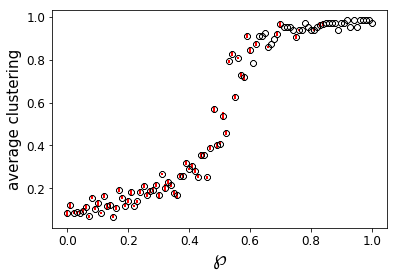

In [9]:
meanCl=[]
stdCl=[]

for key in graphs.keys():
    meanCl+=[np.mean([np.mean(list(dict(bipartite.latapy_clustering(graph)).values())) for graph in graphs[key]])]
    stdCl+=[np.std([np.mean(list(dict(bipartite.latapy_clustering(graph)).values())) for graph in graphs[key]])]

plt.errorbar(THETA, meanCl, yerr=stdCl,ecolor='r',color='k',linewidth=0,elinewidth=2,marker='8',markersize=7,fillstyle='none',markeredgewidth=1,clip_on=False)
#plt.legend(loc='best')
plt.ylabel('average clustering',fontsize=15)
plt.xlabel(r'$\wp$',fontsize=20)
plt.rcParams.update({'font.size': 12})
plt.savefig('clustering.pdf', format='pdf', transparent=True, bbox_inches='tight',dpi=800)
plt.show()
plt.close()

### dynamics!

In [29]:
MAT.keys()

dict_keys([0.0, 0.02, 0.04, 0.06, 0.08, 0.1, 0.12, 0.14, 0.16, 0.18, 0.2, 0.22, 0.24, 0.26, 0.28, 0.3, 0.32, 0.34, 0.36, 0.38, 0.4, 0.42, 0.44, 0.46, 0.48, 0.5, 0.52, 0.54, 0.56, 0.58, 0.6, 0.62, 0.64, 0.66, 0.68, 0.7, 0.72, 0.74, 0.76, 0.78, 0.8, 0.82, 0.84, 0.86, 0.88, 0.9, 0.92, 0.94, 0.96, 0.98, 1.0])

In [30]:
graphs_dynamics={key:[] for key in MAT.keys()}
for key in MAT.keys():
    print(key)
    M_seq=MAT[key]
    graphs_dynamics[key]=[graph(M) for M in M_seq]

0.0
0.02
0.04
0.06
0.08
0.1
0.12
0.14
0.16
0.18
0.2
0.22
0.24
0.26
0.28
0.3
0.32
0.34
0.36
0.38
0.4
0.42
0.44
0.46
0.48
0.5
0.52
0.54
0.56
0.58
0.6
0.62
0.64
0.66
0.68
0.7
0.72
0.74
0.76
0.78
0.8
0.82
0.84
0.86
0.88
0.9
0.92
0.94
0.96
0.98
1.0


In [31]:
pickle.dump(graphs_dynamics,open('graphs_dynamics.p','wb')) ##distribucion

In [84]:
graphs_bipartite={key:[] for key in MAT.keys()}
for key in graphs_dynamics.keys():
    print(key)
    G_seq=graphs_dynamics[key]
    graphs_bipartite[key]=[nx.number_connected_components(G) for G in G_seq]

0.0
0.02
0.04
0.06
0.08
0.1
0.12
0.14
0.16
0.18
0.2
0.22
0.24
0.26
0.28
0.3
0.32
0.34
0.36
0.38
0.4
0.42
0.44
0.46
0.48
0.5
0.52
0.54
0.56
0.58
0.6
0.62
0.64
0.66
0.68
0.7
0.72
0.74
0.76
0.78
0.8
0.82
0.84
0.86
0.88
0.9
0.92
0.94
0.96
0.98
1.0


In [85]:
graphs_bipartite

{0.0: [1, 1, 1, 1, 1, 3, 5, 6, 16, 23, 26, 45, 50, 51, 54, 57, 58, 58, 58, 57],
 0.02: [1,
  1,
  1,
  2,
  3,
  1,
  4,
  8,
  11,
  18,
  30,
  49,
  55,
  52,
  58,
  54,
  58,
  59,
  59,
  60],
 0.04: [1,
  1,
  1,
  1,
  1,
  9,
  7,
  12,
  15,
  24,
  29,
  40,
  46,
  47,
  51,
  54,
  56,
  55,
  58,
  60],
 0.06: [1,
  1,
  1,
  2,
  3,
  6,
  8,
  20,
  12,
  23,
  36,
  47,
  51,
  53,
  55,
  55,
  56,
  57,
  57,
  57],
 0.08: [1,
  1,
  1,
  1,
  1,
  5,
  4,
  7,
  17,
  13,
  28,
  31,
  37,
  53,
  53,
  54,
  54,
  55,
  55,
  56],
 0.1: [1,
  1,
  1,
  1,
  1,
  8,
  9,
  10,
  12,
  23,
  36,
  41,
  47,
  51,
  52,
  58,
  57,
  57,
  57,
  58],
 0.12: [1,
  1,
  1,
  1,
  1,
  4,
  5,
  8,
  15,
  27,
  26,
  36,
  47,
  50,
  53,
  57,
  57,
  56,
  56,
  57],
 0.14: [1,
  1,
  3,
  3,
  2,
  3,
  6,
  5,
  14,
  22,
  26,
  44,
  49,
  50,
  56,
  56,
  57,
  58,
  58,
  59],
 0.16: [1,
  1,
  1,
  1,
  4,
  1,
  4,
  10,
  13,
  23,
  36,
  38,
  47,
  45,
  

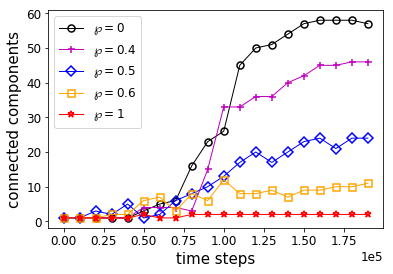

In [86]:
plt.plot([x*10000 for x in range(len(graphs_bipartite[0]))], graphs_bipartite[0],color='k',linewidth=1,marker='o',markersize=7,fillstyle='none',markeredgewidth=1.5,clip_on=False,label=r'$\wp=0$')
plt.plot([x*10000 for x in range(len(graphs_bipartite[0.4]))], graphs_bipartite[0.4],color='m',linewidth=1,marker='+',markersize=7,fillstyle='none',markeredgewidth=1.5,clip_on=False,label=r'$\wp=0.4$')
plt.plot([x*10000 for x in range(len(graphs_bipartite[0.5]))], graphs_bipartite[0.5],color='blue',linewidth=1,marker='D',markersize=7,fillstyle='none',markeredgewidth=1.5,clip_on=False,label=r'$\wp=0.5$')
plt.plot([x*10000 for x in range(len(graphs_bipartite[0.6]))], graphs_bipartite[0.6],color='orange',linewidth=1,marker='s',markersize=7,fillstyle='none',markeredgewidth=1.5,clip_on=False,label=r'$\wp=0.6$')
plt.plot([x*10000 for x in range(len(graphs_bipartite[1]))], graphs_bipartite[1],color='r',linewidth=1,marker='*',markersize=7,fillstyle='none',markeredgewidth=1.5,clip_on=False,label=r'$\wp=1$')

plt.ticklabel_format(axis='x', style='sci',scilimits=(0,5))
plt.legend(loc='best')
plt.ylabel('connected components',fontsize=15)
plt.xlabel('time steps',fontsize=15)
plt.rcParams.update({'font.size': 12})
plt.savefig('components_time.pdf', format='pdf', transparent=True, bbox_inches='tight',dpi=800)
plt.show()
plt.close()

In [87]:
graphs_clustering={key:[] for key in MAT.keys()}
for key in graphs_dynamics.keys():
    print(key)
    G_seq=graphs_dynamics[key]
    graphs_clustering[key]=[np.mean(list(dict(bipartite.latapy_clustering(G)).values())) for G in G_seq]

0.0
0.02
0.04
0.06
0.08
0.1
0.12
0.14
0.16
0.18
0.2
0.22
0.24
0.26
0.28
0.3
0.32
0.34
0.36
0.38
0.4
0.42
0.44
0.46
0.48
0.5
0.52
0.54
0.56
0.58
0.6
0.62
0.64
0.66
0.68
0.7
0.72
0.74
0.76
0.78
0.8
0.82
0.84
0.86
0.88
0.9
0.92
0.94
0.96
0.98
1.0


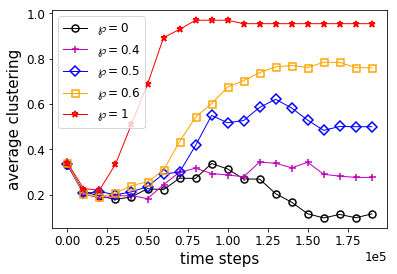

In [88]:
plt.plot([x*10000 for x in range(len(graphs_clustering[0]))], graphs_clustering[0],color='k',linewidth=1,marker='o',markersize=7,fillstyle='none',markeredgewidth=1.5,clip_on=False,label=r'$\wp=0$')
plt.plot([x*10000 for x in range(len(graphs_clustering[0.4]))], graphs_clustering[0.4],color='m',linewidth=1,marker='+',markersize=7,fillstyle='none',markeredgewidth=1.5,clip_on=False,label=r'$\wp=0.4$')
plt.plot([x*10000 for x in range(len(graphs_clustering[0.5]))], graphs_clustering[0.5],color='blue',linewidth=1,marker='D',markersize=7,fillstyle='none',markeredgewidth=1.5,clip_on=False,label=r'$\wp=0.5$')
plt.plot([x*10000 for x in range(len(graphs_clustering[0.6]))], graphs_clustering[0.6],color='orange',linewidth=1,marker='s',markersize=7,fillstyle='none',markeredgewidth=1.5,clip_on=False,label=r'$\wp=0.6$')
plt.plot([x*10000 for x in range(len(graphs_clustering[1]))], graphs_clustering[1],color='r',linewidth=1,marker='*',markersize=7,fillstyle='none',markeredgewidth=1.5,clip_on=False,label=r'$\wp=1$')

plt.ticklabel_format(axis='x', style='sci',scilimits=(0,5))
plt.legend(loc='best')
plt.ylabel('average clustering',fontsize=15)
plt.xlabel('time steps',fontsize=15)
plt.rcParams.update({'font.size': 12})
plt.savefig('clustering_time.pdf', format='pdf', transparent=True, bbox_inches='tight',dpi=800)
plt.show()
plt.close()

### plot

In [34]:
def plot_graph(B,key):
    pos = nx.spring_layout(B)
    labels={i:('w' if i<64 else 'm') for i in B.nodes}
    colors=['orange' if node<64 else 'cyan' for node in B.nodes()]
    nx.draw_networkx_nodes(B, pos, node_size = 50, node_color=colors,alpha=0.75) 
    nx.draw_networkx_edges(B, pos, alpha=1.,width=0.75,edge_color='gray')
    #nx.draw_networkx_labels(B,pos,labels,alpha=0.95,font_size=10,font_color='k')
    plt.axis('off')
    plt.savefig('graph'+str(key)+'.pdf', format='pdf', transparent=True, bbox_inches='tight',dpi=800)
    plt.show()

0.0


/home/srodriguez/miniconda/envs/jupyterhub/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


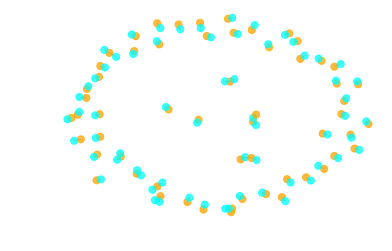

0.02


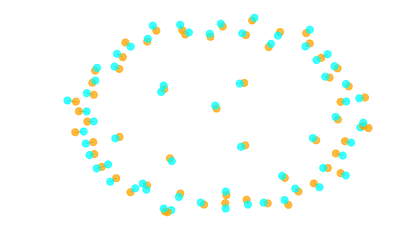

0.04


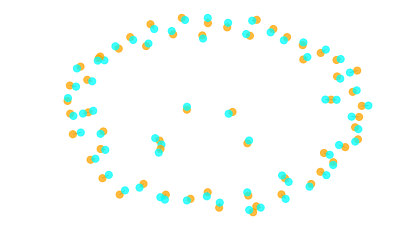

0.06


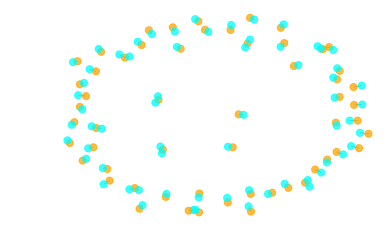

0.08


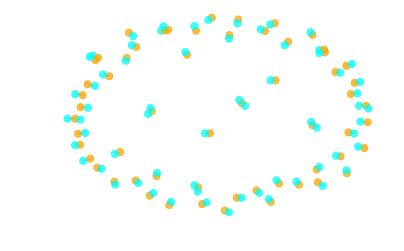

0.1


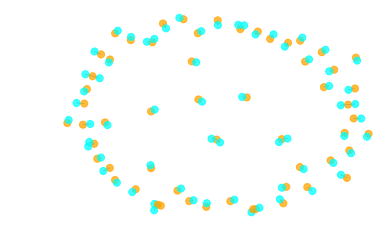

0.12


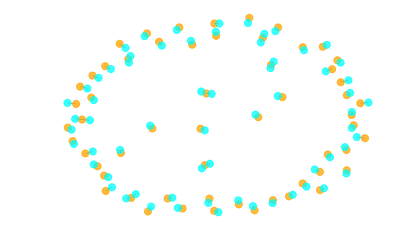

0.14


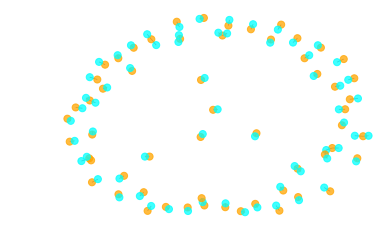

0.16


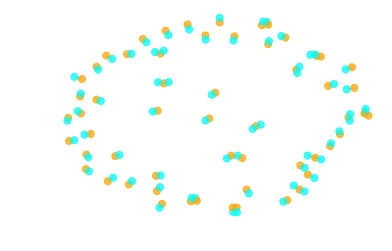

0.18


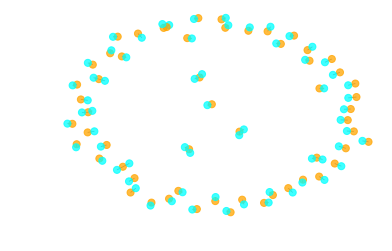

0.2


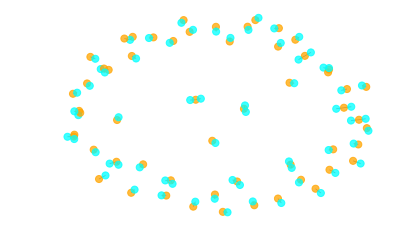

0.22


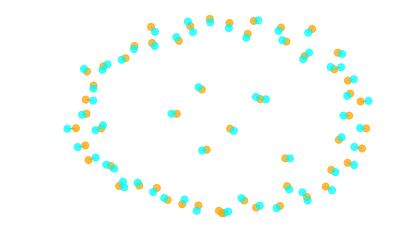

0.24


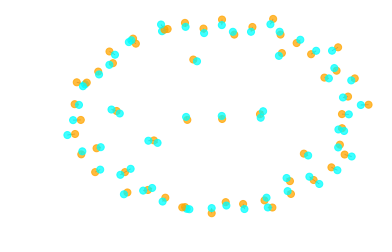

0.26


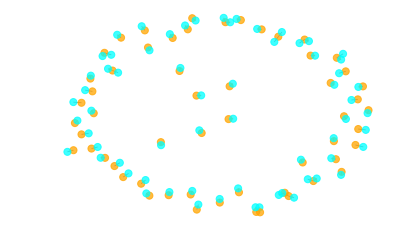

0.28


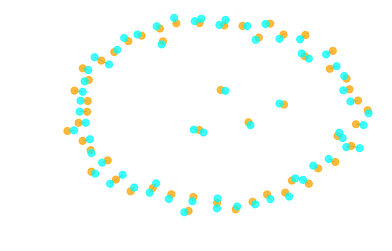

0.3


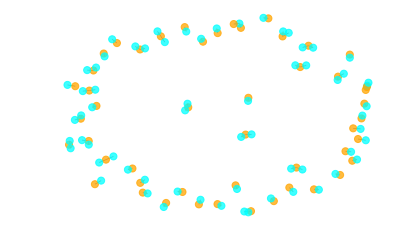

0.32


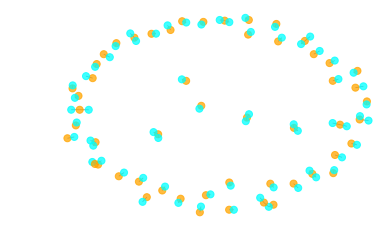

0.34


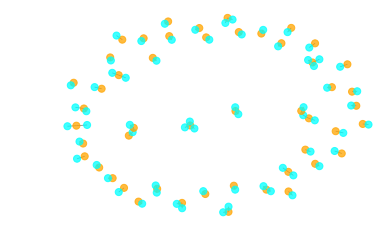

0.36


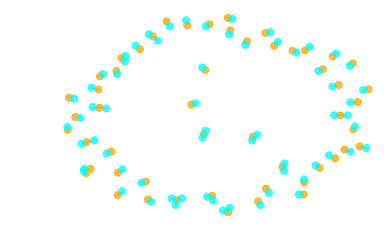

0.38


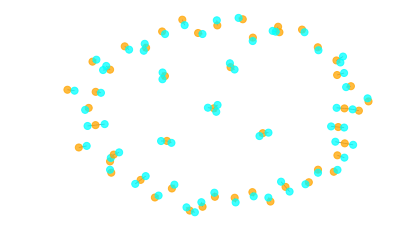

0.4


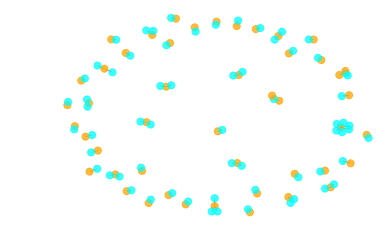

0.42


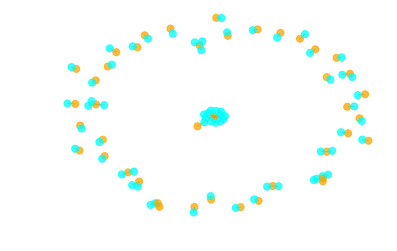

0.44


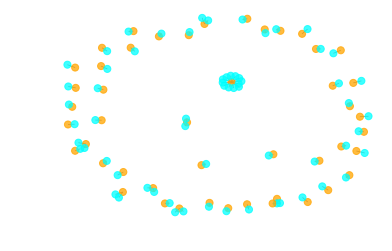

0.46


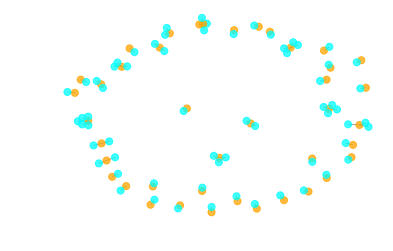

0.48


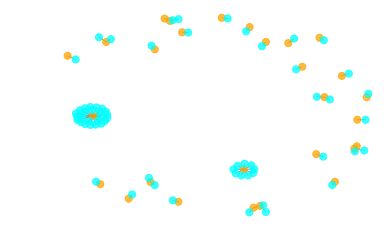

0.5


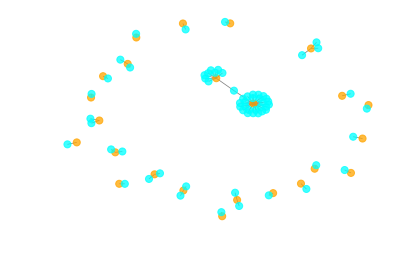

0.52


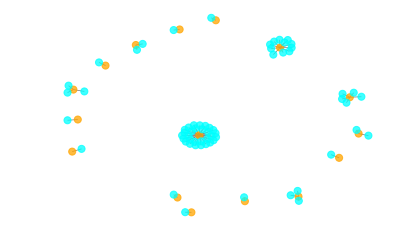

0.54


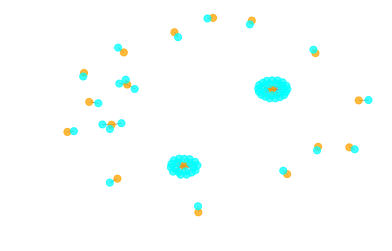

0.56


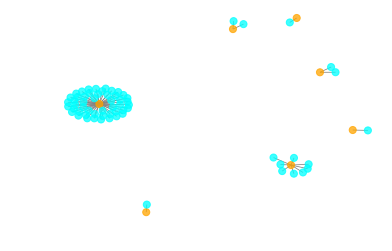

0.58


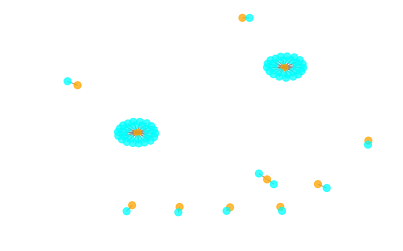

0.6


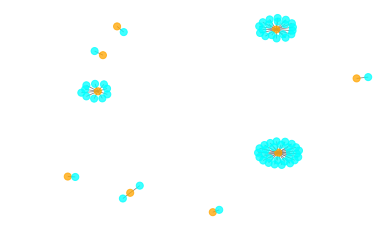

0.62


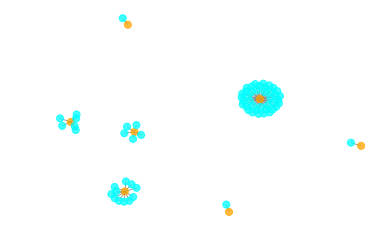

0.64


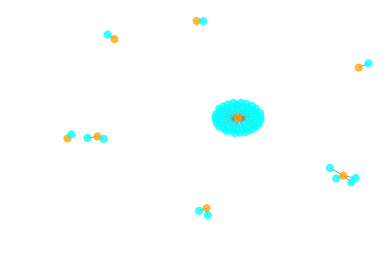

0.66


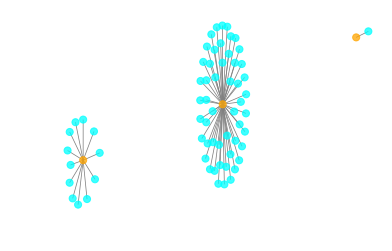

0.68


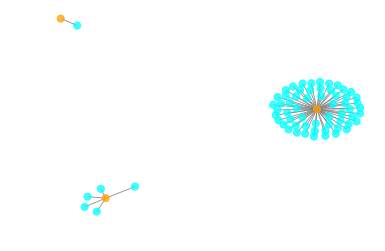

0.7


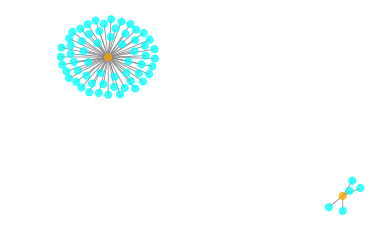

0.72


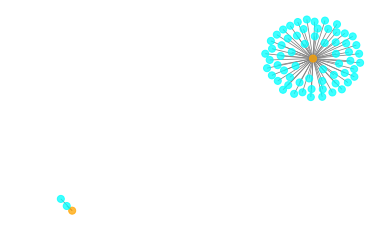

0.74


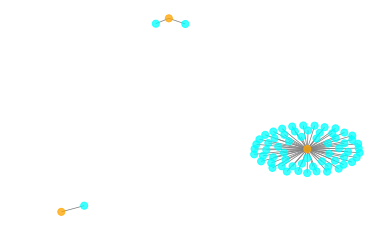

0.76


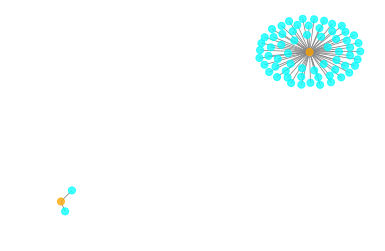

0.78


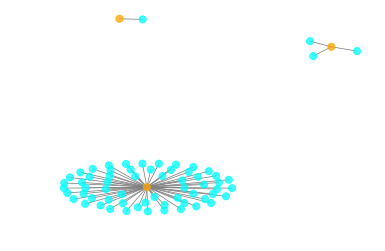

0.8


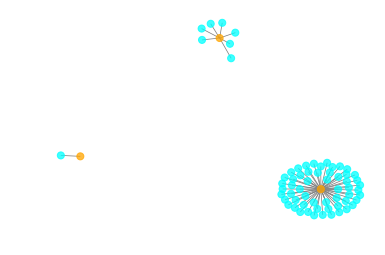

0.82


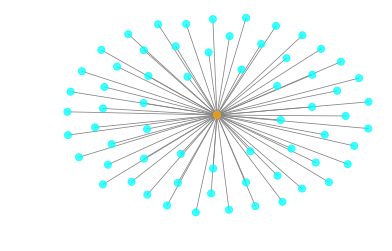

0.84


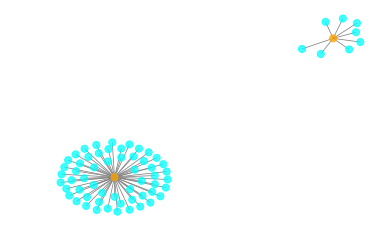

0.86


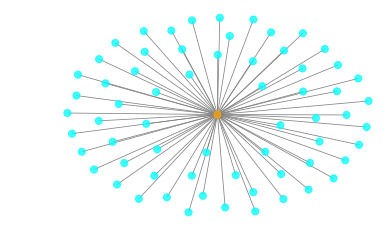

0.88


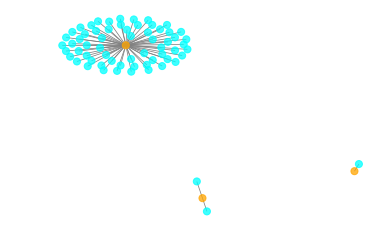

0.9


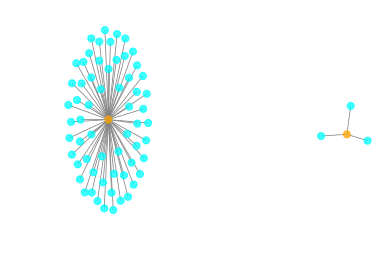

0.92


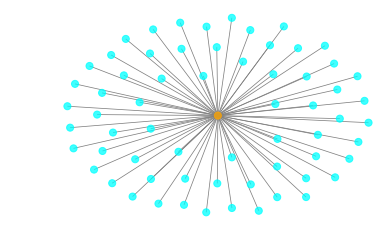

0.94


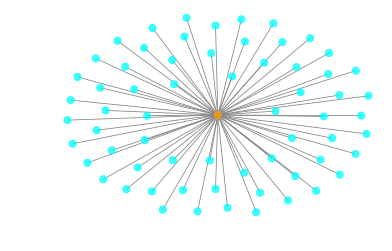

0.96


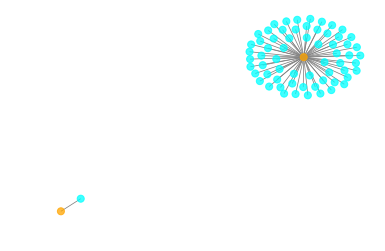

0.98


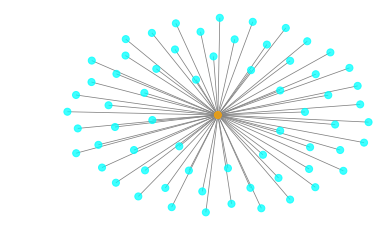

1.0


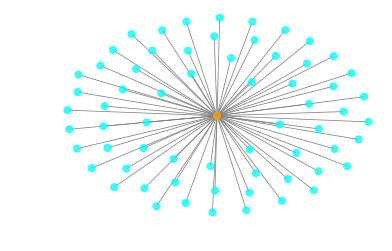

In [37]:
for key in graphs.keys():
    print(key)
    plot_graph(graphs[key][0],key)